# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = "\t")
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
print(data.columns, end = '\n\n')
print(data.info(), end = '\n\n')
print(data.isnull().sum())

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio    

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Таблица: 23699 строк, 22 колонки. Во многих колонках тип данных float64, который скорее всего нужно будет для удобства поменять на int, а также округлить и преобразовать числовые данные.
Есть пропуски в колонках: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.
заметны выбросы по данным, особенно по максимальным значениям.

### Шаг 2. Предобработка данных

In [4]:
# сразу посмотрим есть ли дубликаты
print(data.duplicated().sum())
# явных дубликатов нет

0


In [5]:
#введем колонку цена за кв. метр
data['price_for_mert'] = data['last_price'] / data['total_area']
data['price_for_mert'] = data['price_for_mert'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


12190.0
763000000.0
6541548.771551542
4650000.0

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


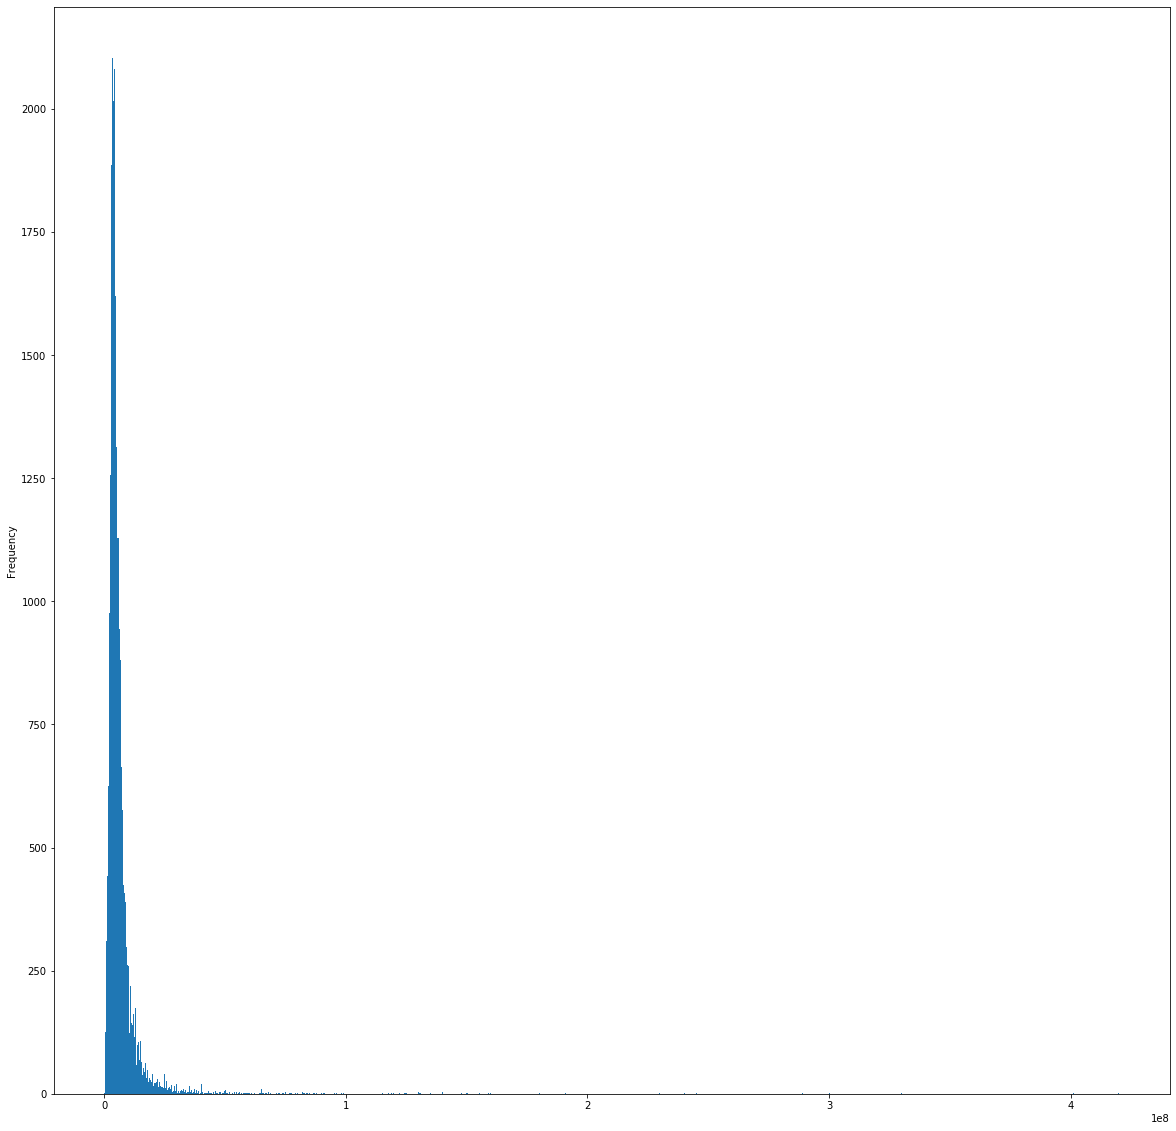

In [6]:
# удалим выбросы по некоторым столбцам и разберемся с пропущенными значениями
print(data['last_price'].min())
print(data['last_price'].max())
print(data['last_price'].mean())
print(data['last_price'].median())
print()
print(data['last_price'].value_counts())
print(data['last_price'].describe())

#среднее и медианное значения сильно различаются, а также минимум и максимум похожи на выбросы

# построим boxplot, посмотрим на значения
data['last_price'].plot(kind = 'hist', bins = 1000, figsize = (20,20), range = (0,420000000))
plt.show()

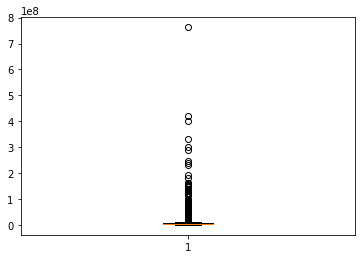

In [7]:
plt.boxplot(data['last_price'])
plt.show()

In [8]:
# на гистограмме мы выдим явно выбивающиеся значения, посмотрим сколько у нас строк с ценой выше 200 млд
#data_big_price = data.query('last_price>=200000000')
#print(data_big_price.shape)
#print(data.query('last_price>=200000000'))
# таких квартир 9. Да, у них большая площадь, но это все равно выбросы. Удаляем.
#data = data.query('last_price<200000000')

def stat_quantile(data, column):
    global Q1
    Q1 = data[column].quantile(0.25)
    global Q3
    Q3 = data[column].quantile(0.75)
    global IQR
    IQR = Q3-Q1    

stat_quantile(data, 'last_price')
print("Количество выбросов:", len(data.query('(last_price < @Q1-1.5*@IQR) or (last_price > @Q3+1.5*@IQR)')))    
data = data.query('(last_price >= @Q1-1.5*@IQR) and (last_price <= @Q3+1.5*@IQR)')

Количество выбросов: 2034


count    21665.000000
mean        53.313656
std         19.112685
min         12.000000
25%         39.000000
50%         49.300000
75%         63.680000
max        230.000000
Name: total_area, dtype: float64
Количество выбросов: 449


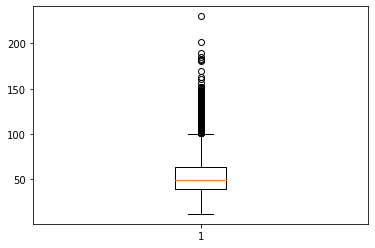

In [9]:
# аналогично стром график по колонки total_area
# находим выбросы, удаляем их.
print(data['total_area'].describe())
plt.boxplot(data['total_area'])

# удалим строки с квартирами более 500 метров.
#data = data.query('total_area <500')


stat_quantile(data, 'total_area')
print("Количество выбросов:", len(data.query('(total_area < @Q1-1.5*@IQR) or (total_area > @Q3+1.5*@IQR)')))    
data = data.query('(total_area >= @Q1-1.5*@IQR) and (total_area <= @Q3+1.5*@IQR)')

In [10]:
# переведем значения в столбце first_day_exposition в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195


[1 2 3 4 0 5 6]
1    8004
2    7588
3    4809
4     585
0     195
5      33
6       2
Name: rooms, dtype: int64
Количество выбросов: 0


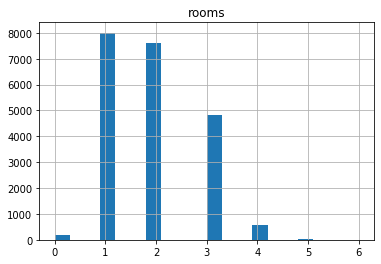

In [11]:
# посмотрим, что у нас со столбцом rooms
print(data['rooms'].unique())
print(data['rooms'].value_counts())
data.hist('rooms', bins = 20)

# 10+ комнат выбиваются, посмотрим что там с площадью таких квартир
#print(data.query('rooms >= 10'))
# Удалим, т.к. выбросы
#data = data.query('rooms < 10')

stat_quantile(data, 'rooms')
print("Количество выбросов:", len(data.query('(rooms < @Q1-1.5*@IQR) or (rooms > @Q3+1.5*@IQR)')))

In [12]:
#что там с нулевыми значениями комнат
data_null = data[(data['rooms']==0) & (data['studio'] == False)]
print(data_null.shape)
pd.set_option('display.max_columns', 500)
display(data_null.head(10))
#print(data_null['open_plan']) #когда я вывожу всю таблицу (data_null.head()), 
                              #из-за того что столбцов много, в середине некоторые столбцы не видны, как увидеть все столбцы?
display(len(data_null[data_null['open_plan']==True]))

(58, 23)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,92800
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,99616
839,14,1900000.0,35.00,2017-04-14,0,2.7,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,54285
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,95652
1574,0,2200000.0,22.00,2017-11-03,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0,100000
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0,82568
2532,5,3500000.0,27.10,2018-02-01,0,NaN,18.0,18.7,9,NaN,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0,129151
3019,18,2100000.0,24.00,2017-11-10,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,87500
4115,7,2600000.0,24.00,2018-02-01,0,NaN,25.0,18.0,4,NaN,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0,108333


58

In [13]:
# мы исключили студии, т.к. там 0 комнат. Осталось 58 квартир, соответствующих нашему условию, все они со свободной планировкой.
# в зависимости от площади проставим им параметр studio-True
# медианную площадь квартир смотрим в свобной таблице ниже
data_pivot = data.pivot_table(index = 'rooms', values = 'total_area', aggfunc=['mean', 'median', 'min', 'max'])
print(data_pivot)

            mean     median        min        max
      total_area total_area total_area total_area
rooms                                            
0      27.172872       26.0       15.5       73.6
1      37.395421       36.5       12.0       96.5
2      54.339564       52.5       20.0      100.3
3      70.247858       69.0       40.1      100.6
4      77.092462       77.7       42.0      100.6
5      85.390909       90.0       40.0      100.6
6      91.000000       91.0       87.0       95.0


In [14]:
# поменяем параметры в таблице
data_change = data.query('rooms==0 and studio == False and total_area <= 30')
data_change['studio'] = True
idx = data_change.index[data_change['studio']]
data.loc[idx, 'studio'] = True
print(data.shape)

# посмотрим, какие данные у нас остались по квартирам с 0 rooms
data_null = data.query('rooms==0 and studio == False')
print(data_null.shape)
print(data_null.head(10))


(21216, 23)
(9, 23)
       total_images  last_price  total_area first_day_exposition  rooms  \
508               0   3375000.0       34.40           2017-03-28      0   
839              14   1900000.0       35.00           2017-04-14      0   
4683              2   3650000.0       35.00           2018-02-01      0   
6805              7   1850000.0       31.00           2017-11-10      0   
7008              4   5200000.0       32.30           2017-09-14      0   
7237              8   2999000.0       42.63           2017-11-27      0   
17805            17   2600000.0       31.10           2017-10-25      0   
19735             1   2800000.0       30.50           2017-10-10      0   
21628             9   3900000.0       34.00           2017-03-18      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
508               NaN          26.0         24.3     19          NaN   False   
839              2.70           5.0         15.0      3        False 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# присвоим квартирам с метражем 30-43 мерта значение 1 в rooms
data_change = data.query('(rooms==0) and (studio == False) and (total_area > 30) and (total_area <= 43)')
data_change['rooms'] = True
idx = data_change.index[data_change['rooms']]
print(idx)
data.loc[idx, 'rooms'] = 1
print(data.shape)

data_null = data.query('rooms==0 and studio == False')
print(data_null.shape)
print(data_null.head(10))

Int64Index([508, 839, 4683, 6805, 7008, 7237, 17805, 19735, 21628], dtype='int64')
(21216, 23)
(0, 23)
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, price_for_mert]
Index: []


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# разберемся с пропущенными значениями
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8399
floors_total               71
living_area              1654
floor                       0
is_apartment            18753
studio                      0
open_plan                   0
kitchen_area             2040
balcony                 10172
locality_name              41
airports_nearest         5446
cityCenters_nearest      5435
parks_around3000         5434
parks_nearest           14693
ponds_around3000         5434
ponds_nearest           13646
days_exposition          2565
price_for_mert              0
dtype: int64


In [18]:
#больше всего пропусков в колонке is_apartment, начнем с нее
print(data['is_apartment'].unique())
print(data.groupby('is_apartment')['is_apartment'].count())
# в заполненных ячейках таблицы присутствуют значения и True и False, но их мало и не понятно как заполнить пропуски,
# Т.к. данная колонка для анализа данных нам в принципе не нужна, мы можем смело ее удалить, чтобы "облегчить" таблицу
data.drop('is_apartment', axis='columns', inplace=True)
# проверим:
print(data.columns)

[nan False True]
is_apartment
False    2429
True       34
Name: is_apartment, dtype: int64
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'price_for_mert'],
      dtype='object')


Минимум: 1.0
Максимум: 32.0
Медиана: 2.6
Среднее: 2.7242435827416718
2.50    3476
2.60    1614
2.70    1471
2.55     967
2.80     829
        ... 
3.37       1
3.78       1
3.49       1
4.06       1
2.20       1
Name: ceiling_height, Length: 158, dtype: int64


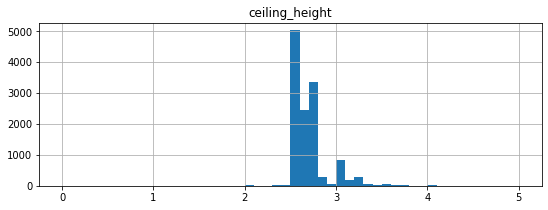

In [19]:
# колонка ceiling_height
print("Минимум:", data['ceiling_height'].min())
print("Максимум:", data['ceiling_height'].max())
print("Медиана:", data['ceiling_height'].median())
print("Среднее:", data['ceiling_height'].mean())
print(data['ceiling_height'].value_counts())
data.hist('ceiling_height',bins=50, range = (0,5), figsize = (9,3))
plt.show()

# по данным и гистограмме видно что у нас есть выбросы,
# тем не менее средняя и медианная высоты достаточно близки: 2,6 и 2,72


In [20]:
#data['ceiling_height'] = data['ceiling_height'].fillna(0)
#data_min2 = data.query('ceiling_height<= 2 and ceiling_height!=0')
#data_max4 = data.query('ceiling_height> 4.5 and ceiling_height!=0')
#print('Количество квартир, где высота потолков больше 4,5 метра:', len(data_max4))
#print('Количество квартир, где высота потолков меньше 2 метров:', len(data_min2))
#print(data.shape)
# на гистограмме видно, что в основном значения высоты потолка расположены в дипозоне 2,5 - 3,5 метра.
# квартир, где высота потолка больше 4,5 метра всего 42, а меньше 2 метров - 14.
# посчитаем данные квартиры выбросами и удалим данные.
#data = data.query('ceiling_height<= 4.5')
#data = data.query('ceiling_height> 2 or ceiling_height==0')

data['ceiling_height'] = data['ceiling_height'].fillna(0)
data_ceiling_0 = data.query('ceiling_height==0')
data_ceiling_1 = data.query('ceiling_height <3 and ceiling_height!=0')
data_ceiling_2 = data.query('ceiling_height >=3 and ceiling_height!=0')

stat_quantile(data_ceiling_1, 'ceiling_height')
print("Количество выбросов:", len(data_ceiling_1.query('(ceiling_height < @Q1-1.5*@IQR) or (ceiling_height > @Q3+1.5*@IQR)'))) 
data_ceiling_1 = data_ceiling_1.query('(ceiling_height >= @Q1-1.5*@IQR) and (ceiling_height <= @Q3+1.5*@IQR)')

stat_quantile(data_ceiling_2, 'ceiling_height')
print("Количество выбросов:", len(data_ceiling_2.query('(ceiling_height < @Q1-1.5*@IQR) or (ceiling_height > @Q3+1.5*@IQR)'))) 
data_ceiling_2 = data_ceiling_2.query('(ceiling_height >= @Q1-1.5*@IQR) and (ceiling_height <= @Q3+1.5*@IQR)')

data = pd.concat([data_ceiling_0, data_ceiling_1, data_ceiling_2], ignore_index=True)
print(len(data))

11231
1586


Количество выбросов: 13
Количество выбросов: 137
11218
1449
21066


Медиана: 2.6
Среднее: 2.671306544564617


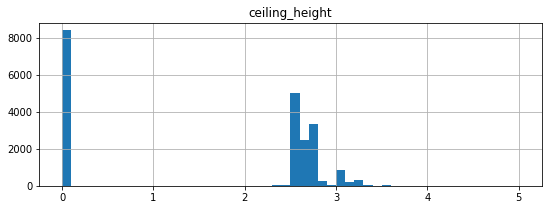

0.028631150199236753


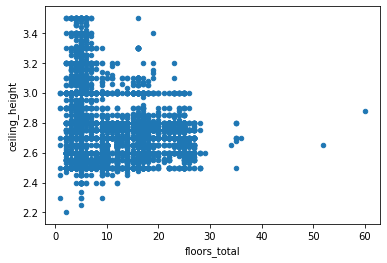

0.3028146813213119


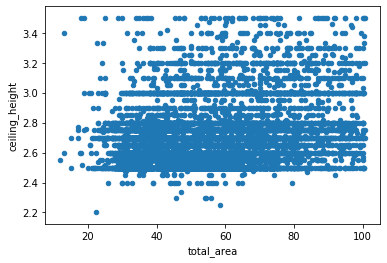

-0.28830846247872427


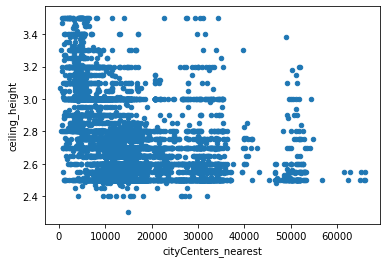

In [22]:
# еще раз посмотрим среднее и медиану и построим гистограмму 
data_ceiling_height = data.query('ceiling_height !=0')
print("Медиана:", data_ceiling_height['ceiling_height'].median())
print("Среднее:", data_ceiling_height['ceiling_height'].mean())
data.hist('ceiling_height',bins=50, range = (0,5), figsize = (9,3))
plt.show()

#data.head(25)

# перед тем как заполнить пропущенные значения в колонке ceiling_height,
# попробуем проверить зависимость данной колонки с колонками floors_total, total_area, cityCenters_nearest 

print(data_ceiling_height['ceiling_height'].corr(data_ceiling_height['floors_total']))
data_ceiling_height.plot(x = 'floors_total', y = 'ceiling_height', kind = 'scatter')
plt.show()
print(data_ceiling_height['ceiling_height'].corr(data_ceiling_height['total_area']))
data_ceiling_height.plot(x = 'total_area', y = 'ceiling_height', kind = 'scatter')
plt.show()
print(data_ceiling_height['ceiling_height'].corr(data_ceiling_height['cityCenters_nearest']))
data_ceiling_height.plot(x = 'cityCenters_nearest', y = 'ceiling_height', kind = 'scatter')
plt.show()

count    21066.000000
mean        51.903751
std         16.746067
min         12.000000
25%         38.800000
50%         48.500000
75%         62.400000
max        100.600000
Name: total_area, dtype: float64


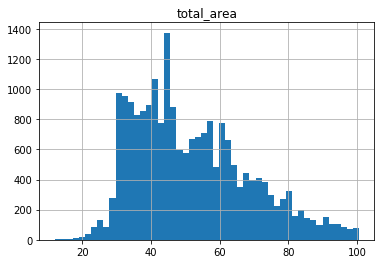

In [24]:
# величина коэффициента корреляции между ceiling_height и floors_total практически нулевая,
# следовательно переменные не связаны между собой
# но есть слабая связь между ceiling_height. возьмем ее за основу.
# добавим колонку с категориями площади, посмотрим среднюю высоту потолков для каждой 

data.hist('total_area', bins = 50)
print(data['total_area'].describe())

In [25]:
def total_area_category(x):
    if x<= 30:
        return 'маленькая'
    elif 30<x<=50:
        return 'ниже среднего'
    elif 50<x<=70:
        return 'средняя'
    elif 70<x<=100:
        return 'выше среднего'
    elif 100<x<=150:
        return 'большая'
    elif 150<x:
        return 'больше 150 метров'

data['total_area_category'] = data['total_area'].apply(total_area_category)
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0             7   3350000.0       40.40           2018-12-04      1   
1            10   5196000.0       56.00           2015-08-20      2   
2            10   2890000.0       30.40           2018-09-10      1   
3             6   3700000.0       37.30           2017-11-02      1   
4             5   7915000.0       71.60           2019-04-18      2   
5            20   2900000.0       33.16           2018-05-23      1   
6             9   3300000.0       44.00           2018-08-27      2   
7            10   3890000.0       54.00           2016-06-30      2   
8             1   4400000.0       36.00           2016-06-23      1   
9            16   4650000.0       39.00           2017-11-18      1   

   ceiling_height  floors_total  living_area  floor  studio  open_plan  \
0             0.0          11.0        18.60      1   False      False   
1             0.0           5.0        34.30      4   False      False

In [26]:
# составляем pilot_table
data_ceiling_height = data.query('ceiling_height !=0')
ceiling_pilot_table = data_ceiling_height.pivot_table(index = 'total_area_category', values = 'ceiling_height', aggfunc=['mean', 'median'])
print(ceiling_pilot_table)
           

                              mean         median
                    ceiling_height ceiling_height
total_area_category                              
большая                   2.968667           2.80
выше среднего             2.791238           2.75
маленькая                 2.629481           2.59
ниже среднего             2.630845           2.60
средняя                   2.673890           2.60


In [28]:
data = data.loc[:].reset_index(drop=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category
0,7,3350000.0,40.4,2018-12-04,1,0.0,11.0,18.6,1,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,ниже среднего
1,10,5196000.0,56.0,2015-08-20,2,0.0,5.0,34.3,4,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,средняя
2,10,2890000.0,30.4,2018-09-10,1,0.0,12.0,14.4,5,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,ниже среднего
3,6,3700000.0,37.3,2017-11-02,1,0.0,26.0,10.6,6,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,ниже среднего
4,5,7915000.0,71.6,2019-04-18,2,0.0,24.0,NaN,22,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,выше среднего


In [32]:

for i in range(len(data)):   
    if data.loc[i, 'ceiling_height'] == 0:
        if (data.loc[i, 'total_area_category'] == 'средняя'):
            data.loc[i, 'ceiling_height'] = ceiling_pilot_table.loc['средняя', ('median', 'ceiling_height')]
        elif (data.loc[i, 'total_area_category'] == 'ниже среднего'):
            data.loc[i, 'ceiling_height'] = ceiling_pilot_table.loc['ниже среднего', ('median', 'ceiling_height')]
        elif (data.loc[i, 'total_area_category'] == 'маленькая'):
            data.loc[i, 'ceiling_height'] = ceiling_pilot_table.loc['маленькая', ('median', 'ceiling_height')]
        elif data.loc[i, 'total_area_category'] == 'выше среднего':
            data.loc[i, 'ceiling_height'] = ceiling_pilot_table.loc['выше среднего', ('median', 'ceiling_height')]
        elif data.loc[i, 'total_area_category'] == 'больше 150 метров':
            data.loc[i, 'ceiling_height'] = ceiling_pilot_table.loc['больше 150 метров', ('median', 'ceiling_height')]
        elif data.loc[i, 'total_area_category'] == 'большая':
            data.loc[i, 'ceiling_height'] = ceiling_pilot_table.loc['большая', ('median', 'ceiling_height')]

In [33]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category
0,7,3350000.0,40.40,2018-12-04,1,2.60,11.0,18.60,1,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,ниже среднего
1,10,5196000.0,56.00,2015-08-20,2,2.60,5.0,34.30,4,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,средняя
2,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,ниже среднего
3,6,3700000.0,37.30,2017-11-02,1,2.60,26.0,10.60,6,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,ниже среднего
4,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,NaN,22,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,выше среднего
5,20,2900000.0,33.16,2018-05-23,1,2.60,27.0,15.43,26,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454,ниже среднего
6,9,3300000.0,44.00,2018-08-27,2,2.60,5.0,31.00,4,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000,ниже среднего
7,10,3890000.0,54.00,2016-06-30,2,2.60,5.0,30.00,5,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,72037,средняя
8,1,4400000.0,36.00,2016-06-23,1,2.60,6.0,17.00,1,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222,ниже среднего
9,16,4650000.0,39.00,2017-11-18,1,2.60,14.0,20.50,5,False,False,7.60,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230,ниже среднего


In [35]:
print(data.shape)
print(data.isnull().sum())

(21066, 23)
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               71
living_area              1646
floor                       0
studio                      0
open_plan                   0
kitchen_area             2025
balcony                 10083
locality_name              39
airports_nearest         5418
cityCenters_nearest      5407
parks_around3000         5406
parks_nearest           14629
ponds_around3000         5406
ponds_nearest           13584
days_exposition          2541
price_for_mert              0
total_area_category         0
dtype: int64


In [37]:
# колонка floors_total.
# значений немного, заполним средними с учетом этажа, на котором расположена квартира
#print(data.query('floors_total != floors_total').head(10))
print("Среднее", data['floors_total'].mean())
print("Медиана", data['floors_total'].median())
# возьмем медиану
data['floors_total'] = data['floors_total'].where(data['floors_total'] == data['floors_total'], round(data['floors_total'].median()))
data['floors_total'] = data['floors_total'].where(data['floors_total'] >= data['floor'], data['floor'])

Среднее 10.83343653250774
Медиана 9.0


In [38]:
# добавим колонку each_floor [первый, последний, другой]
def which_floor_func(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['which_floor'] = data.apply(which_floor_func, axis=1)

In [40]:
# колонка living_area. посмотрим корелляцию с общей площадью
display(data.query('living_area!=living_area').head(10))
print(data['living_area'].corr(data['total_area'])) # возьмем за основу, для заполнения данных


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category,which_floor
4,5,7915000.0,71.6,2019-04-18,2,2.75,24.0,NaN,22,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,выше среднего,другой
15,12,2200000.0,32.8,2018-02-19,1,2.60,9.0,NaN,2,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,67073,ниже среднего,другой
20,13,5350000.0,40.0,2018-11-18,1,2.60,22.0,NaN,3,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,133750,ниже среднего,другой
26,15,6300000.0,46.5,2017-03-06,1,2.60,13.0,NaN,13,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,135483,ниже среднего,последний
27,3,2740000.0,35.0,2018-01-01,1,2.60,12.0,NaN,8,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0,78285,ниже среднего,другой
32,9,10949000.0,68.0,2018-12-27,1,2.60,10.0,NaN,6,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161014,средняя,другой
33,3,4500000.0,80.5,2018-01-15,3,2.75,25.0,NaN,16,False,False,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0,55900,выше среднего,другой
53,12,3150000.0,31.0,2018-03-23,1,2.60,25.0,NaN,6,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0,101612,ниже среднего,другой
61,6,800000.0,40.3,2018-06-25,2,2.60,3.0,NaN,1,False,False,NaN,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0,19851,ниже среднего,первый
62,0,2300000.0,60.0,2017-12-02,2,2.60,3.0,NaN,1,False,False,NaN,NaN,посёлок Плодовое,NaN,NaN,NaN,NaN,NaN,NaN,45.0,38333,средняя,первый


0.9010954236798473


In [41]:
data_pivot_table = data.pivot_table(index = 'total_area_category', values = ['total_area', 'living_area'], aggfunc = ['median', 'mean'])
print(data_pivot_table)

data_pivot_table['new'] = round((data_pivot_table[('median', 'living_area')] / data_pivot_table[('median', 'total_area')]), 2)
print(data_pivot_table)

                         median                   mean            
                    living_area total_area living_area  total_area
total_area_category                                               
большая                   58.18     100.40   60.884737  100.384211
выше среднего             48.00      79.40   48.181460   80.919780
маленькая                 16.20      28.05   16.497494   27.079888
ниже среднего             18.70      40.10   21.250245   39.960093
средняя                   34.70      59.00   35.295238   59.305810
                         median                   mean               new
                    living_area total_area living_area  total_area      
total_area_category                                                     
большая                   58.18     100.40   60.884737  100.384211  0.58
выше среднего             48.00      79.40   48.181460   80.919780  0.60
маленькая                 16.20      28.05   16.497494   27.079888  0.58
ниже среднего             

In [43]:
# заполним data на основании таблице выше.

data = data.loc[:].reset_index(drop=True)

def fill_null(data, data_pivot_table, column):
    for i in range(len(data)):
        if data.loc[i, column] != data.loc[i, column]:
            if data.loc[i, 'total_area_category'] == 'средняя':
                data.loc[i, column] = float(data.loc[i, 'total_area'] * data_pivot_table.loc['средняя', 'new'])
            elif data.loc[i, 'total_area_category'] == 'большая':
                data.loc[i, column] = float(data.loc[i, 'total_area'] * data_pivot_table.loc['большая', 'new'])
            elif data.loc[i, 'total_area_category'] == 'больше 150 метров':
                data.loc[i, column] = float(data.loc[i, 'total_area'] * data_pivot_table.loc['больше 150 метров', 'new'])
            elif data.loc[i, 'total_area_category'] == 'выше среднего':
                data.loc[i, column] = float(data.loc[i, 'total_area'] * data_pivot_table.loc['выше среднего', 'new'])
            elif data.loc[i, 'total_area_category'] == 'маленькая':
                data.loc[i, column] = float(data.loc[i, 'total_area'] * data_pivot_table.loc['маленькая', 'new'])
            elif data.loc[i, 'total_area_category'] == 'ниже среднего':
                data.loc[i, column] = float(data.loc[i, 'total_area'] * data_pivot_table.loc['ниже среднего', 'new'])

fill_null(data, data_pivot_table, 'living_area')
display(data[data['living_area'] != data['living_area']])
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category,which_floor


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category,which_floor
0,7,3350000.0,40.40,2018-12-04,1,2.60,11.0,18.60,1,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,ниже среднего,первый
1,10,5196000.0,56.00,2015-08-20,2,2.60,5.0,34.30,4,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,средняя,другой
2,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,ниже среднего,другой
3,6,3700000.0,37.30,2017-11-02,1,2.60,26.0,10.60,6,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,ниже среднего,другой
4,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,42.96,22,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,выше среднего,другой
5,20,2900000.0,33.16,2018-05-23,1,2.60,27.0,15.43,26,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454,ниже среднего,другой
6,9,3300000.0,44.00,2018-08-27,2,2.60,5.0,31.00,4,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000,ниже среднего,другой
7,10,3890000.0,54.00,2016-06-30,2,2.60,5.0,30.00,5,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,72037,средняя,последний
8,1,4400000.0,36.00,2016-06-23,1,2.60,6.0,17.00,1,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222,ниже среднего,первый
9,16,4650000.0,39.00,2017-11-18,1,2.60,14.0,20.50,5,False,False,7.60,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230,ниже среднего,другой


In [44]:
# колонка living_area. посмотрим корелляцию с общей площадью
print(data['total_area'].corr(data['kitchen_area'])) # возьмем за основу, для заполнения данных, по аналогии с living_area
print(data['living_area'].corr(data['kitchen_area'])) 

0.39559612773071695
0.08979700827699065


In [45]:
data_pivot_table = data.pivot_table(index = 'total_area_category', values = ['total_area', 'kitchen_area'], aggfunc = ['median', 'mean'])
print(data_pivot_table)

data_pivot_table['new'] = round((data_pivot_table[('median', 'kitchen_area')] / data_pivot_table[('median', 'total_area')]), 2)
print(data_pivot_table)

                          median                    mean            
                    kitchen_area total_area kitchen_area  total_area
total_area_category                                                 
большая                    13.28     100.40    13.593684  100.384211
выше среднего              11.20      79.40    12.254528   80.919780
маленькая                   6.00      28.05     6.257635   27.079888
ниже среднего               8.20      40.10     8.659098   39.960093
средняя                     9.00      59.00     9.659320   59.305810
                          median                    mean               new
                    kitchen_area total_area kitchen_area  total_area      
total_area_category                                                       
большая                    13.28     100.40    13.593684  100.384211  0.13
выше среднего              11.20      79.40    12.254528   80.919780  0.14
маленькая                   6.00      28.05     6.257635   27.079888  0.2

In [47]:
# заполним data на основании таблице выше.
fill_null(data, data_pivot_table, 'kitchen_area')
            
print(data[data['kitchen_area'] != data['kitchen_area']])
display(data.head(10))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, price_for_mert, total_area_category, which_floor]
Index: []


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category,which_floor
0,7,3350000.0,40.40,2018-12-04,1,2.60,11.0,18.60,1,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,ниже среднего,первый
1,10,5196000.0,56.00,2015-08-20,2,2.60,5.0,34.30,4,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,средняя,другой
2,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,ниже среднего,другой
3,6,3700000.0,37.30,2017-11-02,1,2.60,26.0,10.60,6,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,ниже среднего,другой
4,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,42.96,22,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,выше среднего,другой
5,20,2900000.0,33.16,2018-05-23,1,2.60,27.0,15.43,26,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454,ниже среднего,другой
6,9,3300000.0,44.00,2018-08-27,2,2.60,5.0,31.00,4,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000,ниже среднего,другой
7,10,3890000.0,54.00,2016-06-30,2,2.60,5.0,30.00,5,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,72037,средняя,последний
8,1,4400000.0,36.00,2016-06-23,1,2.60,6.0,17.00,1,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222,ниже среднего,первый
9,16,4650000.0,39.00,2017-11-18,1,2.60,14.0,20.50,5,False,False,7.60,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230,ниже среднего,другой


In [48]:
# колонка locality_name
print(len(data['locality_name'].unique()))
print(len(data['locality_name'].str.lower().unique()))
print(data['locality_name'].value_counts())

363
363
Санкт-Петербург                    13308
посёлок Мурино                       520
посёлок Шушары                       431
Всеволожск                           390
Колпино                              332
                                   ...  
посёлок Платформа 69-й километр        1
деревня Большое Рейзино                1
деревня Лаврики                        1
посёлок Дзержинского                   1
поселок Возрождение                    1
Name: locality_name, Length: 362, dtype: int64


In [49]:
# посмотрим, можно ли что-то вытащить из столбца locality_name через лемматизацию

data['locality_name'] = data['locality_name'].fillna('0')
stem_word = list(data['locality_name'])
from pymystem3 import Mystem
m = Mystem() 
lemmas = []
for i in stem_word:
    lemmas.extend(m.lemmatize(i))
from collections import Counter
c = Counter(lemmas)
print(c)

# что-то нового мы не получили, заполненные проуски пока оставим с "0"

Counter({'\n': 21066, 'санкт-петербург': 13308, ' ': 5137, 'поселок': 2621, 'деревня': 932, 'муриный': 587, 'городской': 540, 'кудрово': 468, 'шушар': 431, 'всеволожск': 390, 'тип': 355, 'колпино': 332, 'пушкин': 331, 'парголовый': 324, 'гатчина': 299, 'выборг': 217, 'село': 204, 'петергоф': 194, 'новый': 184, 'красный': 184, 'сестрорецк': 161, 'девяткино': 142, 'сертолово': 139, 'ломоносов': 127, 'кириши': 124, 'бугор': 114, 'сланцы': 111, 'волхов': 110, 'кингисепп': 102, 'тосно': 101, 'сосновый': 100, 'бор': 97, 'никольское': 94, '-': 91, 'коммунар': 90, 'кронштадт': 88, 'кировск': 84, 'отрадный': 79, 'старый': 75, 'янино': 68, '1': 68, 'приозерск': 66, 'металлострой': 64, 'луг': 58, 'шлиссельбург': 56, 'имя': 52, 'тихвин': 49, 'стрельна': 41, 'тельман': 40, 'большой': 39, '0': 39, 'рощино': 38, 'романовка': 37, 'волосово': 36, 'свердлов': 36, 'кузьмоловский': 35, 'павловск': 35, 'мга': 32, 'ивангород': 28, 'сиверский': 28, 'новоселье': 28, 'малый': 28, 'сясьстрой': 24, 'щегловый': 2

In [51]:
# колонка cityCenters_nearest. 
display(data.query('cityCenters_nearest != cityCenters_nearest').head(10))
# проверим, заполнено ли значение locality_name, при пустом полеcityCenters_nearest
print(len(data.query('cityCenters_nearest != cityCenters_nearest and locality_name ==0')))
# отлично, на основании locality_name заполним поле cityCenters_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category,which_floor
2,10,2890000.0,30.40,2018-09-10,1,2.6,12.0,14.400,5,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,ниже среднего,другой
5,20,2900000.0,33.16,2018-05-23,1,2.6,27.0,15.430,26,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454,ниже среднего,другой
7,10,3890000.0,54.00,2016-06-30,2,2.6,5.0,30.000,5,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,72037,средняя,последний
15,12,2200000.0,32.80,2018-02-19,1,2.6,9.0,15.416,2,False,False,6.56,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,67073,ниже среднего,другой
21,17,3600000.0,56.10,2018-10-18,3,2.6,4.0,42.500,3,False,False,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0,64171,средняя,другой
27,3,2740000.0,35.00,2018-01-01,1,2.6,12.0,16.450,8,False,False,7.00,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0,78285,ниже среднего,другой
32,9,10949000.0,68.00,2018-12-27,1,2.6,10.0,40.120,6,False,False,10.20,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161014,средняя,другой
34,11,2400000.0,43.90,2019-03-13,2,2.6,2.0,27.460,1,False,False,5.20,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54669,ниже среднего,первый
36,0,1700000.0,33.10,2019-04-09,1,2.6,5.0,18.400,1,False,False,6.40,NaN,посёлок городского типа Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51359,ниже среднего,первый
38,20,2130000.0,54.00,2015-10-28,2,2.6,3.0,28.000,1,False,False,8.50,0.0,поселок Молодцово,NaN,NaN,NaN,NaN,NaN,NaN,439.0,39444,средняя,первый


0


In [52]:
data_pivot_table = data.pivot_table(index = 'locality_name', values = 'cityCenters_nearest', aggfunc = ['median', 'mean'] )
print(data_pivot_table)

                                     median                mean
                        cityCenters_nearest cityCenters_nearest
locality_name                                                  
0                                    9497.0        11521.483871
Зеленогорск                         53383.0        54949.809524
Колпино                             32018.0        32104.492447
Красное Село                        29130.5        30041.923529
Кронштадт                           49542.0        49100.080460
Ломоносов                           51628.0        50644.960317
Павловск                            32655.0        33245.057143
Петергоф                            33771.0        35502.798969
Пушкин                              28067.0        28772.809091
Санкт-Петербург                     12820.0        12393.521706
Сестрорецк                          34735.0        34573.832298
поселок Лисий Нос                   28246.0        28246.000000
поселок Мурино                      2188

In [53]:
for i in range(len(data)):
        if data.loc[i, 'cityCenters_nearest'] != data.loc[i, 'cityCenters_nearest']:
            try:
                data.loc[i, 'cityCenters_nearest'] = data_pivot_table.loc[data.loc[i, 'locality_name'], ('median', 'cityCenters_nearest')]
            except:
                pass
print(len(data.query('cityCenters_nearest != cityCenters_nearest')))
#print(data.head(10))
data_city = data.query('cityCenters_nearest != cityCenters_nearest')

# к сожалению заполнилось немного данных, поэтому возьмем 10 самых больших локаций,
# посмотрим данные о расстоянии в открытых источниках и проставим расстояние
#print(data_city['locality_name'].value_counts().head(10))
data_city = data_city['locality_name'].value_counts()
data_city = data_city[0:10]
print(data_city)


5295
посёлок Мурино             520
Всеволожск                 390
Гатчина                    299
деревня Кудрово            297
Выборг                     217
Кудрово                    171
деревня Новое Девяткино    142
Сертолово                  139
Кириши                     124
Сланцы                     111
Name: locality_name, dtype: int64


In [54]:
data_distance = [['посёлок Мурино', 15670], ['Всеволожск', 22370], ['Гатчина', 41400], ['деревня Кудрово', 12420],
                 ['Выборг', 121130], ['Кудрово', 12380], ['деревня Новое Девяткино',18300], ['Сертолово',24500],
                 ['Кириши', 110840], ['Сланцы', 95410]]
columns_new = ['locality_name', 'cityCenters_nearest']
data_distance_df = pd.DataFrame(data=data_distance, columns = columns_new)
data_distance_df.index = data_distance_df.locality_name
print(data_distance_df)

for i in range(len(data)):
        if data.loc[i, 'cityCenters_nearest'] != data.loc[i, 'cityCenters_nearest']:
            try:
                loc_name = data.loc[i, 'locality_name']
                data.loc[i, 'cityCenters_nearest'] = data_distance_df.loc[loc_name, 'cityCenters_nearest']
            except:
                pass
print(len(data.query('cityCenters_nearest != cityCenters_nearest')))

# осталось 3000 незаполненных значений, пока оставим.

                                   locality_name  cityCenters_nearest
locality_name                                                        
посёлок Мурино                    посёлок Мурино                15670
Всеволожск                            Всеволожск                22370
Гатчина                                  Гатчина                41400
деревня Кудрово                  деревня Кудрово                12420
Выборг                                    Выборг               121130
Кудрово                                  Кудрово                12380
деревня Новое Девяткино  деревня Новое Девяткино                18300
Сертолово                              Сертолово                24500
Кириши                                    Кириши               110840
Сланцы                                    Сланцы                95410
2885


In [55]:
#Дополним таблицу колонкой с расстоянием в километрах
data['cityCenters_nearest_in km'] = round((data['cityCenters_nearest']/1000))

In [56]:
print(data.isnull().sum())

total_images                     0
last_price                       0
total_area                       0
first_day_exposition             0
rooms                            0
ceiling_height                   0
floors_total                     0
living_area                      0
floor                            0
studio                           0
open_plan                        0
kitchen_area                     0
balcony                      10083
locality_name                    0
airports_nearest              5418
cityCenters_nearest           2885
parks_around3000              5406
parks_nearest                14629
ponds_around3000              5406
ponds_nearest                13584
days_exposition               2541
price_for_mert                   0
total_area_category              0
which_floor                      0
cityCenters_nearest_in km     2885
dtype: int64


In [57]:
# столбец days_exposition. посмотрим корреляцию
print(data['days_exposition'].corr(data['last_price']))
print(data['days_exposition'].corr(data['total_area']))
print(data['days_exposition'].corr(data['cityCenters_nearest'])) 
# зависимость слабая, пока оставим пропуски, добавим столбец, продажа в месяцах
data['months_exposition'] = round((data['days_exposition'] / 30), 2)
data.head()


0.06509618237225064
0.09930908850573564
-0.011255450713323685


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_mert,total_area_category,which_floor,cityCenters_nearest_in km,months_exposition
0,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.60,1,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,ниже среднего,первый,19.0,2.70
1,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.30,4,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,средняя,другой,14.0,18.60
2,10,2890000.0,30.4,2018-09-10,1,2.60,12.0,14.40,5,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,ниже среднего,другой,NaN,1.83
3,6,3700000.0,37.3,2017-11-02,1,2.60,26.0,10.60,6,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,ниже среднего,другой,19.0,5.17
4,5,7915000.0,71.6,2019-04-18,2,2.75,24.0,42.96,22,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,выше среднего,другой,12.0,NaN


In [58]:
# добавим колонки
data['ratio_living_total'] = round((data['living_area'] / data['total_area']), 2)
data['ratio_kitchen_total'] = round((data['kitchen_area'] / data['total_area']), 2)
data['price in millions'] = data['last_price'] / 1000000
data['month'] = data['first_day_exposition'].dt.month
data['day'] = data['first_day_exposition'].dt.day
data['year'] = data['first_day_exposition'].dt.year

In [59]:
import calendar
data['month_name'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [60]:
# преобразуем тип по столбцам
data['floors_total'] = data['floors_total'].astype('int')
data['last_price'] = data['last_price'].astype('int')

In [61]:
# пропуски в колонках balcony, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пока оставим,
# т.к. данные по этим колонкам не нужны для финального анализа 


### Шаг 3. Проведите исследовательский анализ данных и выполните инструкции:

Медиана: 48.5
Среднее: 51.9037505933732


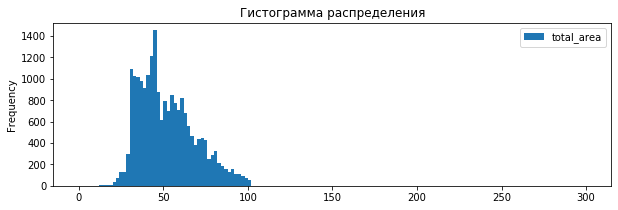

Медиана: 4.35
Среднее: 4.746533125605241


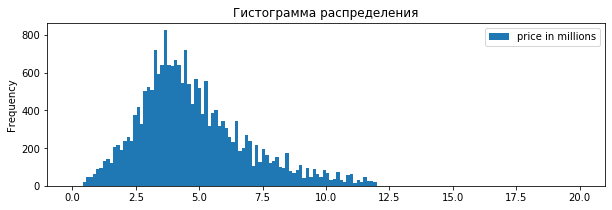

Медиана: 2.0
Среднее: 1.8899174024494445


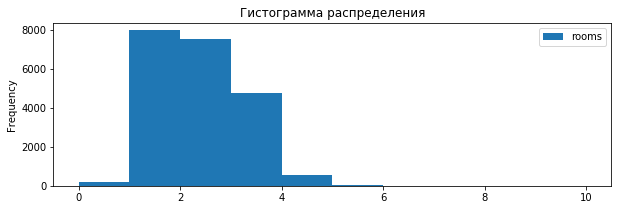

Медиана: 2.6
Среднее: 2.6512403873540302


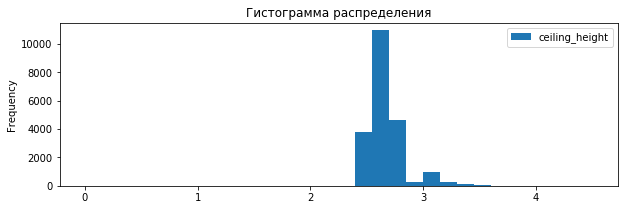

In [64]:
# построим гистограммы для каждого параметра: площадь, цена, число комнат, высота потолков.
def hist_draw(data, param, bins, lim):
    print('Медиана:', data[param].median())
    print('Среднее:', data[param].mean())
    data.plot(kind = 'hist', y = param, bins = bins, figsize = (10,3), range = (0,lim), title = 'Гистограмма распределения')
    plt.show()
    
hist_draw(data, 'total_area', 150, 300)
hist_draw(data, 'price in millions', 150, 20)
hist_draw(data, 'rooms', 10, 10)
hist_draw(data, 'ceiling_height', 30, 4.5)

In [65]:
# Согласно гистограмме наибольшее число квартир продается с площадью 30-70 кв. метров, пик приходится на 45-50 кв.метров
# При этом медианная цена квартиры 4.35 млн. рублей
# в основном продают квартиры с одной, двумя и реже тремя комнатами.
# Средняя высота потолков 2,65

Среднее время продажи квартиры: 6 месяцев
Медианное время продажи квартиры: 3 месяца
Минимум времени на продажу квартиры 1 день
Максимум времени на продажу квартиры 52.67 месяца
Количество квартир проданных за месяц: 3514
Медиана: 3.0
Среднее: 5.699238866396761


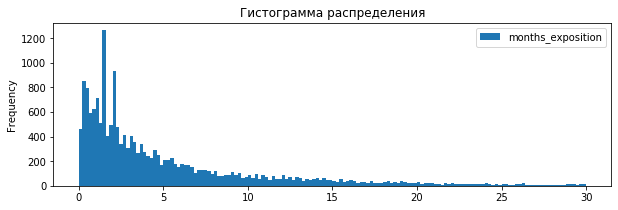

Медиана: 3.0
Среднее: 5.699238866396761


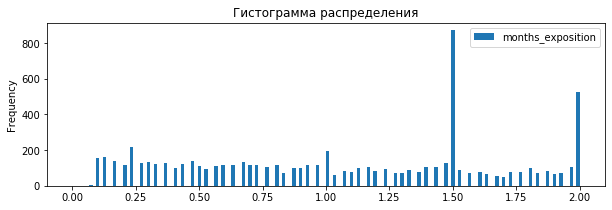

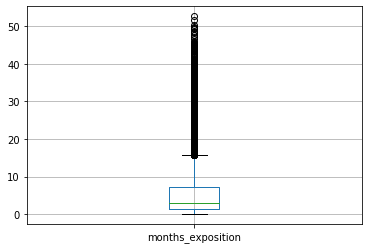

count    18525.000000
mean         5.699239
std          6.980324
min          0.030000
25%          1.430000
50%          3.000000
75%          7.200000
max         52.670000
Name: months_exposition, dtype: float64


In [76]:
# Изучите время продажи квартиры. Постройте гистограмму.
# Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.
# Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
print("Среднее время продажи квартиры:", round(data['months_exposition'].mean()), 'месяцев')
print("Медианное время продажи квартиры:", round(data['months_exposition'].median()), 'месяца')
print('Минимум времени на продажу квартиры', round(data['days_exposition'].min()), 'день')
print('Максимум времени на продажу квартиры', data['months_exposition'].max(), 'месяца')
print("Количество квартир проданных за месяц:", len(data.query('days_exposition<=30')))
hist_draw(data, 'months_exposition', 150, 30)
data.boxplot(['months_exposition'])
plt.show()
print(data['months_exposition'].describe())

In [87]:
Q1_1 = data['months_exposition'].quantile(0.25)
Q3_3 = data['months_exposition'].quantile(0.75)
print(data['months_exposition'].median() - Q1_1*2 )
print(data['months_exposition'].median() + Q3_3*2 )

print(data.query('months_exposition <0.2'))

0.14000000000000012
17.4
       total_images  last_price  total_area first_day_exposition  rooms  \
123              10     4150000        52.5           2019-03-25      2   
200              13     3500000        38.0           2017-07-10      2   
211               9     1990000        33.0           2017-05-18      1   
216              11     2699000        30.0           2019-04-18      1   
228              15     5799000        64.0           2018-11-16      3   
...             ...         ...         ...                  ...    ...   
20761            19    11500000        73.0           2019-01-11      2   
20806            13     6700000        75.1           2018-07-23      2   
20855             6     4950000        42.8           2018-09-11      1   
21053            10     1600000        92.0           2018-07-10      3   
21060             0     2850000        68.0           2018-07-29      1   

       ceiling_height  floors_total  living_area  floor  studio  open_plan

In [88]:
# в среднем квартира продается 3-6 месяцев.
# Если объявление о продаже квартиры висит больше 17.4 месяцев , то можно считать,
# что такие продажи прошли необычно долго (среднее плюс два квартиля)
# все что продается до 4 дней можно считать быстрой продажей (среднее минус два квартиля)

                     price in millions  total_area     rooms  \
price in millions             1.000000    0.680381  0.410542   
total_area                    0.680381    1.000000  0.799662   
rooms                         0.410542    0.799662  1.000000   
cityCenters_nearest          -0.366641   -0.071934 -0.010460   

                     cityCenters_nearest  
price in millions              -0.366641  
total_area                     -0.071934  
rooms                          -0.010460  
cityCenters_nearest             1.000000  


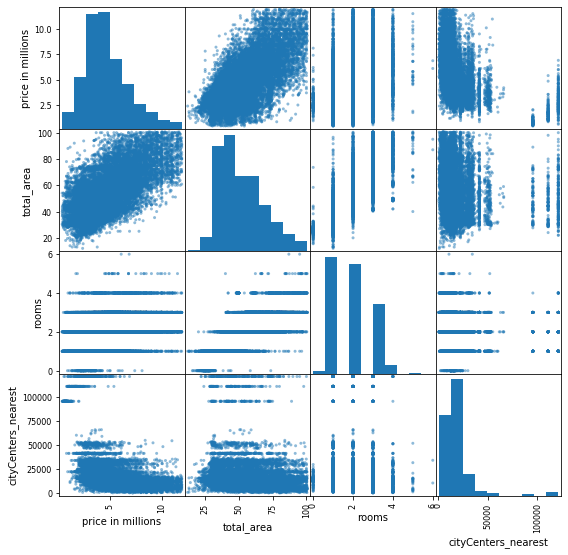

In [89]:
#Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.

data_matrix = data.loc[:, ['price in millions', 'total_area', 'rooms', 'cityCenters_nearest']]
print(data_matrix.corr())
pd.plotting.scatter_matrix(data_matrix, figsize = (9,9))
plt.show()

In [90]:
#Изучив, зависит ли цена от площади, числа комнат, удалённости от центра, мы можем с уверенностью утверждать,
#что цена на квартиру зависит от площади квартиры.
#Также есть небольшая зависимость от количества комнат, но скорее всего это связано именно с площадью квартиры.
#Т.е. обычно чем больше площадь квартиры, чем больше комнат, и соответственно выше цена.
#Также по графику видно, что чем ближе к центру, тем выше цена н аквартиру.

            price in millions
                       median
which_floor                  
другой                   4.50
первый                   3.79
последний                4.00


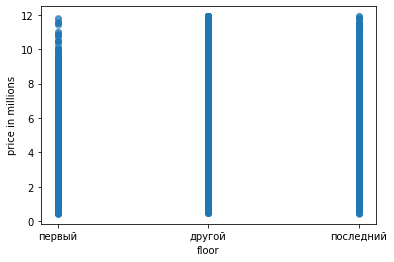

In [92]:
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
data_floor = data.groupby('which_floor').agg({'price in millions':['median']})
print(data_floor)
plt.scatter(data['which_floor'], data['price in millions'], alpha = 0.5)
plt.xlabel('floor')
plt.ylabel('price in millions')
plt.show()

In [93]:
# Самые дешевые квартиры расположены на первом этаже.
# Также цена за квартиры на последних этажах в среднем ниже чем на других (кроме первого)

   index price in millions          
                    median      mean
0      1             4.300  4.710478
1      2             4.342  4.695167
2      3             4.400  4.783310
3      4             4.550  4.925125
4      5             4.400  4.789518
5      6             4.150  4.645219
6      7             4.200  4.595326
7      8             4.350  4.766017
8      9             4.250  4.690679
9     10             4.400  4.896694
10    11             4.345  4.735121
11    12             4.525  4.803656
12    13             4.400  4.759421
13    14             4.250  4.651690
14    15             4.350  4.771382
15    16             4.350  4.740369
16    17             4.250  4.591049
17    18             4.490  4.775202
18    19             4.400  4.767195
19    20             4.470  4.888190
20    21             4.300  4.761597
21    22             4.300  4.686905
22    23             4.400  4.847083
23    24             4.400  4.791367
24    25             4.200  4.625210
2

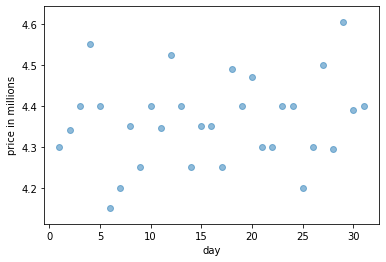

   index price in millions          
                    median      mean
0      1            4.3500  4.722297
1      2            4.3500  4.746306
2      3            4.3995  4.726008
3      4            4.5000  4.850165
4      5            4.3000  4.720548
5      6            4.2000  4.608191
6      7            4.3000  4.718433
7      8            4.3300  4.767957
8      9            4.3460  4.792461
9     10            4.3000  4.729115
10    11            4.4000  4.748554
11    12            4.4000  4.791983


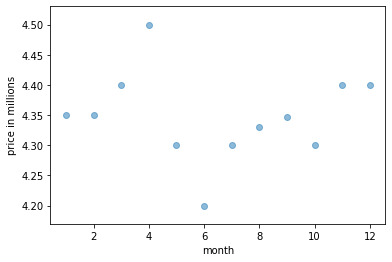

  index price in millions          
                   median      mean
0  2014              5.40  5.646691
1  2015              4.75  5.047000
2  2016              4.25  4.670821
3  2017              4.20  4.657362
4  2018              4.35  4.704930
5  2019              4.80  5.054205


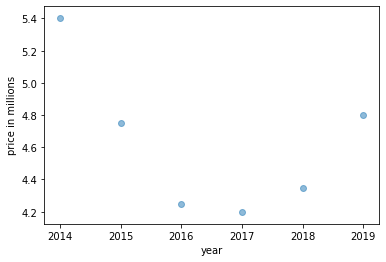

In [95]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года.
def scatter_data(data, x):
    data_period = data.groupby(x).agg({'price in millions':['median', 'mean']})
    data_period = data_period.rename_axis('index').reset_index()
    print(data_period)
    
    plt.scatter(data_period['index'], data_period[('price in millions', 'median')], alpha = 0.5)
    plt.xlabel(x)
    plt.ylabel('price in millions')
    plt.show()
    

scatter_data(data, 'day')
scatter_data(data, 'month')
scatter_data(data, 'year')

In [96]:
# 29 число дни с самой дорогой стоимостью квартир.
# Апрель пулучился самым дорогим месяцем, также квартиры к концу года дорожают.
# Самые высокие цены на квартиру были в 2014 году, потом они упали и постепенно росли к 2019.

In [97]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений.
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
#Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.
#data_pivot_table = data.pivot_table(index = 'locality_name', values = ['locality_name','price_for_mert'], aggfunc = ['count', 'mean'] )
data_locality= data['locality_name'].value_counts()
columns = ['locality_name', 'price_for_mert']
data_locality_counts = pd.DataFrame(data= data_locality,columns = columns )
data_locality_counts = data_locality_counts.rename_axis('place').reset_index()
data_locality_counts = data_locality_counts.loc[0:10]
print(data_locality_counts)

data_pivot_table = data.pivot_table(index = 'locality_name', values = "price_for_mert", aggfunc = ['mean', 'median'])
print(data_pivot_table.head())
for i in range(len(data_locality_counts)):
    data_locality_counts.loc[i, 'price_for_mert'] = data_pivot_table.loc[data_locality_counts.loc[i, 'place'], ('mean','price_for_mert')]
print(data_locality_counts.sort_values(by = 'price_for_mert', ascending = False))

                place  locality_name price_for_mert
0     Санкт-Петербург          13308            NaN
1      посёлок Мурино            520            NaN
2      посёлок Шушары            431            NaN
3          Всеволожск            390            NaN
4             Колпино            332            NaN
5              Пушкин            331            NaN
6   посёлок Парголово            324            NaN
7             Гатчина            299            NaN
8     деревня Кудрово            297            NaN
9              Выборг            217            NaN
10           Петергоф            194            NaN
                        mean         median
              price_for_mert price_for_mert
locality_name                              
0               86993.589744        84656.0
Бокситогорск    17456.800000        17222.0
Волосово        40182.888889        39906.0
Волхов          35054.681818        34926.5
Всеволожск      67156.346154        65789.0
                place  l

In [98]:
# Среди 10 наиболее популярных населенных пунктов можно выделить Санкт-Петербург и Пушкин,
#как наиболее дорогие - 105 и 100 тысячи рублей за кв метр соответственно,
# и Всеволожск и Выборг, как населенные пункты из топ-10 с наименьшей ценой за квадратный метр - 67 и 58 тысячи соответственно.

                                       mean            median
                          price in millions price in millions
cityCenters_nearest_in km                                    
0.0                                6.650000          7.050000
1.0                                7.910261          8.000000
2.0                                7.674364          7.770000
3.0                                7.070018          6.950000
4.0                                7.280562          7.100000
5.0                                7.401917          7.203654
6.0                                7.002436          6.740000
7.0                                6.630943          6.300000
8.0                                6.530570          6.210000
9.0                                5.487690          4.990000
10.0                               5.372915          4.800000
11.0                               5.263820          4.850000
12.0                               5.257289          4.800000
13.0    

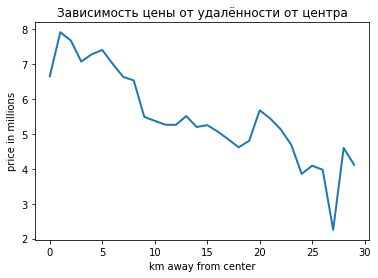

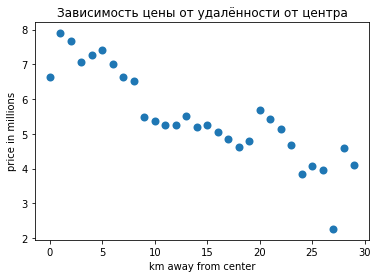

In [99]:
#Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.
#Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр.
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
#После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать,
#как цена зависит от удалённости от центра.
#Определите границу, где график сильно меняется — это и будет центральная зона.
data_sp = data.query('locality_name == "Санкт-Петербург"')
data_sp_pivot_table = data_sp.pivot_table(index = 'cityCenters_nearest_in km', values = "price in millions", aggfunc = ['mean', 'median'])
print(data_sp_pivot_table)
plt.plot(data_sp_pivot_table.index, data_sp_pivot_table[('mean', 'price in millions')], linewidth=2.0)
plt.ylabel('price in millions')
plt.xlabel('km away from center')
plt.title('Зависимость цены от удалённости от центра')
plt.show()

plt.scatter(data_sp_pivot_table.index, data_sp_pivot_table[('mean', 'price in millions')], linewidth=2.0)
plt.ylabel('price in millions')
plt.xlabel('km away from center')
plt.title('Зависимость цены от удалённости от центра')
plt.show()

In [100]:
# центральная зона - расстояние от центра в пределах 7 км. После этой зоны цена резко уменьшается.

In [101]:
#Выделите сегмент квартир в центре.
#Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
#Также выделите факторы, которые влияют на стоимость квартиры
#(число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы.
#Отличаются ли они от общих выводов по всему городу?
data_center = data[data['cityCenters_nearest_in km'] <=7]
print(data_center.head())

    total_images  last_price  total_area first_day_exposition  rooms  \
12             8     6500000        97.2           2015-10-31      2   
28            18     7990000        74.0           2017-08-24      2   
41            32     9600000        90.0           2017-09-26      4   
47             4     4590000        40.0           2017-05-29      1   
54             8     4800000        40.0           2017-11-18      2   

    ceiling_height  floors_total  living_area  floor  studio  open_plan  \
12            2.75             3         46.5      1   False      False   
28            2.75             4         43.0      4   False      False   
41            2.75             5         67.0      2   False      False   
47            2.60             6         18.0      1   False      False   
54            2.60             3         29.0      2   False      False   

    kitchen_area  balcony    locality_name  airports_nearest  \
12          19.6      0.0  Санкт-Петербург          

Медиана: 61.5
Среднее: 62.10424630541872


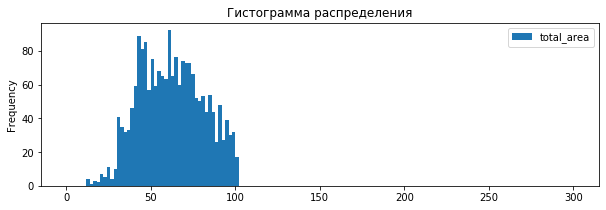

Медиана: 7.0
Среднее: 7.195293839408867


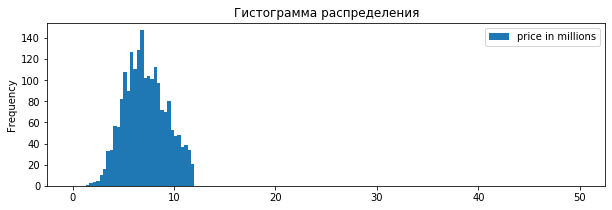

Медиана: 2.0
Среднее: 2.2019704433497536


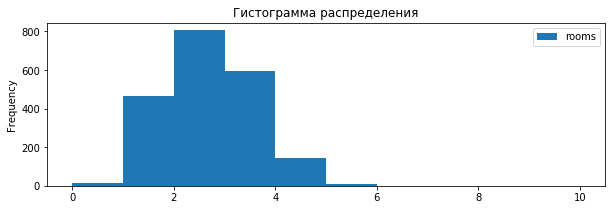

Медиана: 2.75
Среднее: 2.8337192118226606


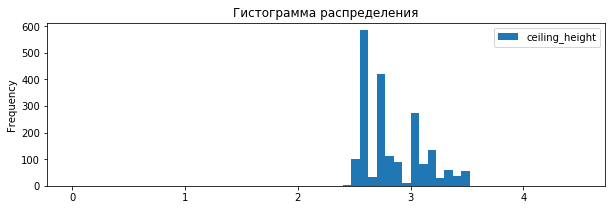

In [102]:
# площадь, цена, число комнат, высота потолков в центре

hist_draw(data_center, 'total_area', 150, 300)
hist_draw(data_center, 'price in millions', 150, 50)
hist_draw(data_center, 'rooms', 10, 10)
hist_draw(data_center, 'ceiling_height', 60, 4.5)

In [103]:
print(data['ceiling_height'].value_counts())

2.60    8380
2.50    3476
2.75    2012
2.70    1471
2.55     967
        ... 
3.34       1
2.25       1
2.49       1
2.20       1
3.39       1
Name: ceiling_height, Length: 106, dtype: int64


In [104]:
# для квартир в центре характерна продажа 2-3-комнатных квартир с большей площадью, в среднем 62 кв.метров,
# с высотой потолка 2,60б 2,70 или 3,10 метров и соответственно выше ценой: 7 млн

                           price in millions     rooms     floor  \
price in millions                   1.000000  0.410542  0.147940   
rooms                               0.410542  1.000000 -0.180207   
floor                               0.147940 -0.180207  1.000000   
cityCenters_nearest_in km          -0.366358 -0.010385 -0.107399   

                           cityCenters_nearest_in km  
price in millions                          -0.366358  
rooms                                      -0.010385  
floor                                      -0.107399  
cityCenters_nearest_in km                   1.000000  


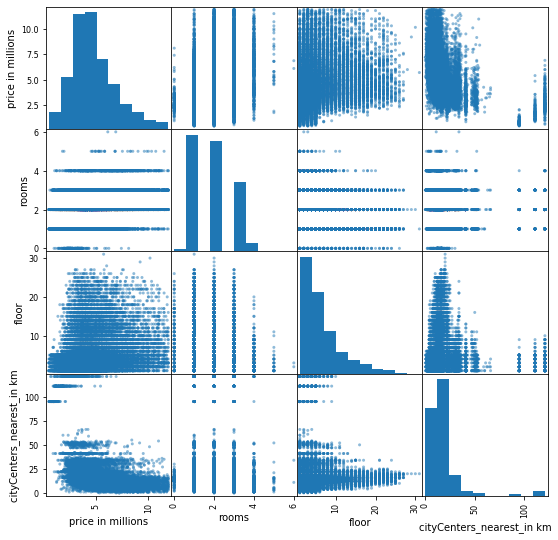

In [105]:
# факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
data_center_matrix = data.loc[:, ['price in millions', 'rooms', 'floor', 'cityCenters_nearest_in km', 'first_day_exposition']]
print(data_center_matrix.corr())
pd.plotting.scatter_matrix(data_center_matrix, figsize = (9,9))
plt.show()

            price in millions
                       median
which_floor                  
другой                   7.30
первый                   5.90
последний                7.05


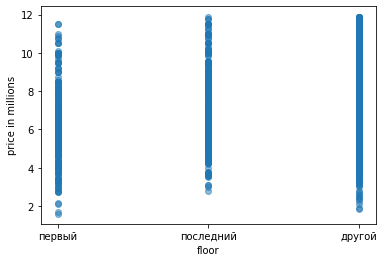

In [106]:
# зависимость цены от этажа
data_center_floor = data_center.groupby('which_floor').agg({'price in millions':['median']})
print(data_center_floor)
plt.scatter(data_center['which_floor'], data_center['price in millions'], alpha = 0.5)
plt.xlabel('floor')
plt.ylabel('price in millions')
plt.show()

In [107]:
# чем больше комнат, тем больше цена, это связано с площадью.
# цена не зависит от этажа, если это "другой" этаж. Цена на квартиры на первых этажах самая низкая.
# цена выше ближе к центру.

   index price in millions          
                    median      mean
0      1          6.825000  7.075966
1      2          6.800000  7.117272
2      3          7.102793  7.509056
3      4          6.967615  7.111122
4      5          7.245000  7.320369
5      6          7.050000  7.300238
6      7          6.600000  6.871625
7      8          6.725000  7.034220
8      9          6.940000  6.994142
9     10          7.552581  7.538183
10    11          7.575000  7.518218
11    12          6.800000  6.871655
12    13          6.925000  7.234681
13    14          7.400000  7.215384
14    15          7.785000  7.596101
15    16          7.025000  7.197629
16    17          7.563000  7.467911
17    18          7.200000  6.889395
18    19          6.700000  7.365493
19    20          7.453552  7.549793
20    21          7.203654  7.361203
21    22          6.990000  6.997511
22    23          6.800000  6.922770
23    24          6.700000  6.854305
24    25          6.390000  7.091853
2

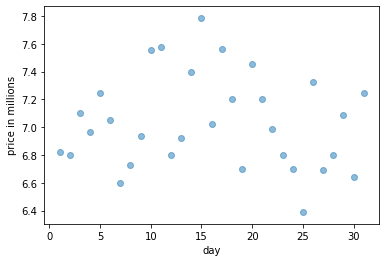

   index price in millions          
                    median      mean
0      1             7.000  7.268483
1      2             7.150  7.252348
2      3             7.300  7.292589
3      4             7.100  7.233341
4      5             6.900  7.138178
5      6             6.980  7.011512
6      7             6.900  7.109014
7      8             6.950  7.149495
8      9             7.495  7.625972
9     10             7.100  7.205342
10    11             6.800  7.064561
11    12             6.700  6.928013


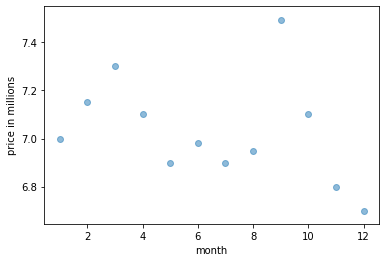

  index price in millions          
                   median      mean
0  2014             5.965  6.890000
1  2015             7.000  7.233414
2  2016             7.000  7.239717
3  2017             6.900  7.114245
4  2018             7.080  7.210580
5  2019             7.325  7.344822


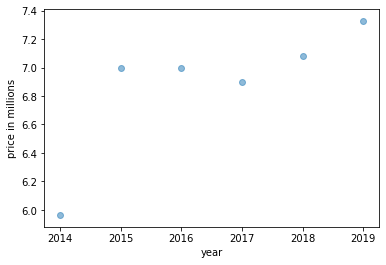

In [108]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года.

scatter_data(data_center, 'day')
scatter_data(data_center, 'month')
scatter_data(data_center, 'year')

In [109]:
# выбивается 15 число, в этот день самые высокие цены на квартиры.
# самым "дорогим" месяцем оказался сентябрь
# что касается года продажи, то здесь 2014, наоборот стал самым дешевым - 5,96 млн. руб, замет цена выросла до 7 млн в 2015 и продолжила раси в 2019 - 7,3 млн


In [113]:
print(data['price_for_mert'].median())
print(data['price_for_mert'].mean())
print(data_center['price_for_mert'].median())
print(data_center['price_for_mert'].mean())

92787.5
92135.4475458084
115695.5
119954.57438423645
7195293.839408867


In [111]:
print(data.shape)

(21066, 33)


### Шаг 4. Общий вывод

В моем распоряжении был архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Датасет состоял из 23699 строк (объявлений) и 22-ух колонок (различные параметры и характеристики). В таблице было много пропусков. Сперва я ввела новую колонку с категориями квартир в зависимоти от общей площади (total_area_category): большая, ниже среднего, средняя, больше 150 метров, выше среднего, маленькая. А затем заполнила пропуски средними значениями в зависимости от категории в колонках: "высота потолка" (ceiling_height), "жилая площадь" (living_area), "площадь кухни" (kitchen_area). За основу была взята имено общая площадь, т.к. коэффициент корреляции между общей площадью и высотой потолка, жилой площадью и площадью кухни был примерно 0,4, что указывает на небольшую, но связь. Колонку "всего этажей" (floors_total) я заполнила медианным значением. Если этаж расположения квартиры был выше медианного значения, то я заполняла пустое значение в колонке "всего этаже" значением из колонки "этаж". Для заполнения колонки расположение (locality_name)  я посмотрела данные о расстоянии 10 самых больших незаполненных локаций в открытых источниках и проставила расстояние. Выбросы и аномальные значения по цене, площади квартиры, количеству комнат были удалены. Для удобства восприятия я поменяла тип данных float64 на int в некоторых колонках, а также новые колонки: price_for_mert', 'total_area_category', 'which_floor', 'cityCenters_nearest_in km', 'months_exposition', 'ratio_living_total', 'ratio_kitchen_total', 'price in millions', 'month', 'day', 'year', 'month_name'. После всех преобразований у меня получилось 21066 строчек и 33 колонки.

1) Мною изучены и построены гистограммы для каждого параметра: площадь, цена, число комнат, высота потолков, этаж.
Согласно гистограммам наибольшее число квартир продается с площадью 30-70 кв. метров, пик приходится на 45-50 кв.метров. При этом медианная цена квартиры 4.35 млн. рублей. В основном продают квартиры с одной, двумя и реже тремя комнатами. Средняя высота потолков 2,65 м.
Самые дешевые квартиры расположены на первом этаже (медианная цена 3,79 млн). Также цена за квартиры на последних этажах в среднем ниже, чем на других (кроме первого): 4 и 4.5 млн соответственно.
Изучив, зависит ли цена от площади, числа комнат, удалённости от центра, мы можем с уверенностью утверждать, что цена на квартиру зависит от площади квартиры, чем больше площадь, тем больше цена. Также есть небольшая зависимость от количества комнат, но скорее всего это связано именно с площадью квартиры. Т.е. обычно, чем больше площадь квартиры, чем больше комнат, и соответственно выше цена. И конечно, чем ближе к центру, тем выше цена на квартиру.

2) Изучено и построены гистограммы для времени продажи квартиры.
Интересно, что 29-ого числа выставляются квартиры с самой дорогой стоимостью. В целом можно сказать, что квартиры обычно дорожают в конце года, также самый дорогой месяц это апрель. Изучив период 2014-2019 г. видно, что самыемые высокие цены на квартиру были в 2014 году (медианная цена 5,4 млн), затем они постепенно опустились до 4,2 млн в 2017, и выросли в 2018 и 2019 до 4,8. Медианная стоимость квартиры в 2019 составляет 5,05 млн руб.
Среднее время продажи квартиры: 6 месяцев
Медианное время продажи квартиры: 3 месяца
Минимум времени на продажу квартиры 1 день
Максимум времени на продажу квартиры 52.67 месяца
Количество квартир проданных за месяц: 3514
Итого, в среднем квартира продается 3-6 месяцев. Если объявление о продаже квартиры висит больше 17.4 месяцев , то можно считать, что такие продажи прошли необычно долго. Все что продается до 4 дней можно считать быстрой продажей 

3) Выбрав 10 населённых пунктов с наибольшим числом объявлений, я посчитала среднюю цену квадратного метра в этих населённых пунктах. Среди 10 наиболее популярных населенных пунктов можно выделить Санкт-Петербург и Пушкин, как наиболее дорогие - 105 и 100 тысячи рублей за кв метр соответственно, а  Всеволожск и Выборг, как наиболее дешевые - 67 и 58 тысячи рублей за кв метр соответственно.

4) Проанализировав квартиры в Санкт-Петербурге, я выделила область, которую можно обозначить, как центральную зону - удаленность от центра менее 7км. Выделив сегмент квартир в центре, я проанализировала эту территорию и изучила следующие параметры: площадь, цена, число комнат, высота потолков; и факторы, которые влияют на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления.
Для квартир в центре характерна продажа 2-3-комнатных квартир с площадью, в среднем 62 кв.метров, что в больше средних показателей по всему городу и пригороду. По высоте потолка можно выделить дополнительный пик 3,10 метров. Естественно квартиры в центральной зоне выше по стоимости, чем в городе и пригороде: 7.2 млн (медианная цена).
Чем больше комнат, тем больше цена, это связано с площадью. Цена не зависит от этажа, если это "другой" этаж (медианная цена 7,3 млн руб). Но цена на квартиры на первом этаже по прежнему самая нижкая: 5,9 млн руб. Даже в центральной зоне сохраняется тенденция, чем ближе к центру - тем дороже.
Что касается всемени продаж, выбивается число 15, в этот день самые высокие цены на квартиры - пости 8 млн. Самым "дорогим" месяцем оказался сентябрь - 7,5 млн руб. Что касается года продажи, то здесь 2014, наоборот стал самым дешевым - 5,96 млн. руб, замет цена выросла до 7 млн в 2015 и продолжила раси в 2019 - 7,3 млн.

Итого: цена квартиры практически напрямую зависим от площади квартиры и расстояния до центра.  Средняя цена по городу за квадратный метр на порядок ниже чем в центральной зоне: 92 и 115 тысячи соответственно. Стоит отметить, что наиболее дешевые квартиры расположены на первом этаже вне зависмости центр это или пригород. Последний этаж также пользуется меньшей популярностью. Квартиры продающиеся в центре города не только дороже, но и обычно больше по площади. Также стоит отметить что в 2014 году цены на квартиры по городу были самые высокие за период 2014-2019, но в центральной зоне наоборот этот, в этот год цена на квартиры была самая низкая.
